In [1]:
import numpy as np
import pandas as pd

In [4]:
from scipy.stats import binom

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000
N_pos = 113
F_H0 = binom(n=N, p=0.1)
N_pos_available = np.arange(0, N + 1, 1)
probabilities = F_H0.pmf(N_pos_available)

C:\Users\maslo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\maslo\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


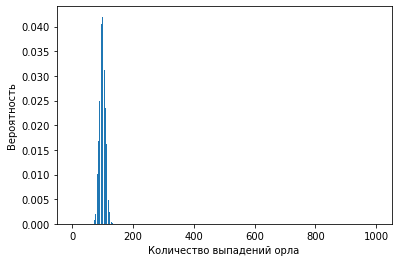

In [49]:
plt.bar(N_pos_available, probabilities)
plt.xlabel('Количество выпадений орла')
plt.ylabel('Вероятность')
plt.show()

In [32]:
N = 1000
N_pos = 113
F_H0 = binom(n=N, p=0.1)

In [50]:
p_val = F_H0.cdf(100 - 13) + 1 - F_H0.cdf(113) 

In [52]:
p_val

0.17122792598236214

In [53]:
from scipy.stats import binom_test

binom_test(x=N_pos, n=N, p=0.1, alternative='two-sided')

0.1705138422368937

In [54]:
binom_test(x=113, n=1000, p=0.1, alternative='two-sided')

0.1705138422368937

In [55]:
from scipy.stats import t

In [56]:
mu0 = 16.5
N = 100

mu = 18.1
std = 8.2
t_n = (mu - mu0) / (std / np.sqrt(N))

2 * (1 - t(N-1).cdf(np.abs(t_n)))

0.05385741608695005

In [57]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [61]:
df[df['HouseAge'] <= 30]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
50,0.9218,21.0,2.045662,1.034247,735.0,1.678082,37.82,-122.27
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29
70,1.7719,26.0,6.047244,1.196850,392.0,3.086614,37.81,-122.29
74,2.4830,20.0,6.278195,1.210526,290.0,2.180451,37.81,-122.29
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
from scipy.stats import ttest_ind

ttest_ind(
    df[df['HouseAge'] <= 30].MedInc,
    df[df['HouseAge'] > 30].MedInc,
    equal_var=False,
    alternative='two-sided'
)

Ttest_indResult(statistic=12.832590060636896, pvalue=1.5106543204708846e-37)

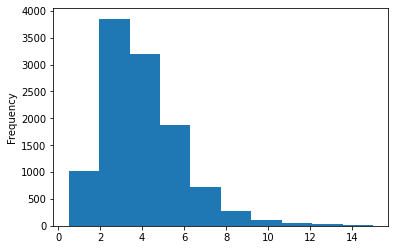

In [64]:
df[df['HouseAge'] <= 30].MedInc.plot(kind='hist')

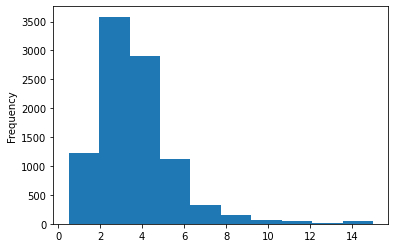

In [65]:
df[df['HouseAge'] > 30].MedInc.plot(kind='hist')

In [67]:
data_le_30 = df[df['HouseAge'] <= 30].MedInc

In [68]:
data_g_30 = df[df['HouseAge'] > 30].MedInc

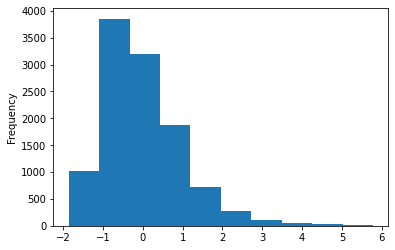

In [81]:
((data_le_30 - data_le_30.mean()) / data_le_30.std()).plot(kind='hist')

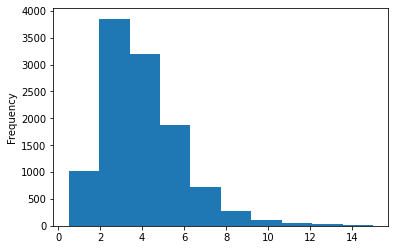

In [80]:
data_le_30.plot(kind='hist')

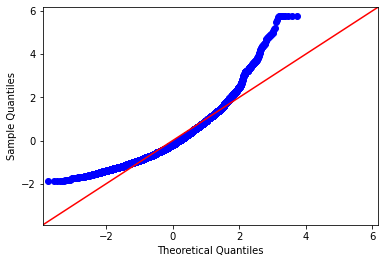

In [69]:
import statsmodels.api as sm

values = (data_le_30 - data_le_30.mean()) / data_le_30.std()
sm.qqplot(values, line='45')
plt.show()

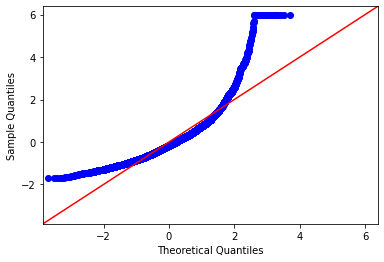

In [70]:
values = (data_g_30 - data_g_30.mean()) / data_g_30.std()
sm.qqplot(values, line='45')
plt.show()

In [71]:
from scipy.stats import shapiro

shapiro(data_g_30)

C:\Users\maslo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8525030612945557, pvalue=0.0)

In [72]:
shapiro(data_le_30)

ShapiroResult(statistic=0.9215106964111328, pvalue=0.0)

In [85]:
norm_data_g_30 = (data_g_30 - data_g_30.mean()) / data_g_30.std()
norm_data_le_30 = (data_le_30 - data_le_30.mean()) / data_le_30.std()

In [86]:
norm_data_g_30

0        2.461636
2        1.894840
3        1.037959
4        0.084152
5        0.185323
           ...   
20620    0.464369
20621   -0.701496
20623   -0.458705
20625    0.232141
20626   -0.807339
Name: MedInc, Length: 9495, dtype: float64

In [87]:
norm_data_le_30

1        2.250513
50      -1.634539
59      -0.770779
70      -1.186997
74      -0.812632
           ...   
20635   -1.298395
20636   -0.773780
20637   -1.224849
20638   -1.136825
20639   -0.862330
Name: MedInc, Length: 11145, dtype: float64

In [89]:
log_data_g_30 = np.log(data_g_30)
log_data_le_30 = np.log(data_le_30)

norm_log_data_g_30 = (log_data_g_30 - log_data_g_30.mean()) / log_data_g_30.std()
norm_log_data_le_30 = (log_data_le_30 - log_data_le_30.mean()) / log_data_le_30.std()

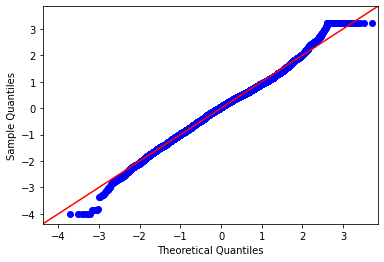

In [90]:
sm.qqplot(norm_log_data_g_30, line='45')
plt.show()

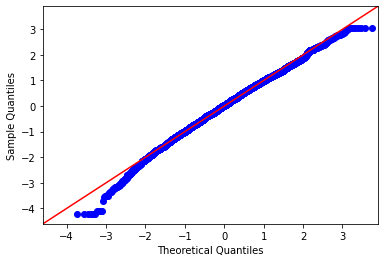

In [91]:
sm.qqplot(norm_log_data_le_30, line='45')
plt.show()

In [92]:
shapiro(norm_log_data_g_30)

C:\Users\maslo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9950175285339355, pvalue=1.283846514664363e-17)

In [93]:
shapiro(norm_log_data_le_30)

ShapiroResult(statistic=0.9963215589523315, pvalue=3.9070694358283046e-16)